In [1]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")

In [2]:
import numpy as np
np.random.seed(42)

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
# MNIST is already separated into 2 sets, one of 60k digits and one of 10k digits
X_all, y_all = mnist.data, mnist.target
X_all.shape, y_all.shape

((70000, 784), (70000,))

In [6]:
# Separate them into training and test set: X_train,y_train being training set and X_test, y_test being test set
split = X_all.shape[0] - 10000
X_train, y_train = X_all[:split,:], y_all[:split]
X_test, y_test = X_all[split:,:], y_all[split:]

In [7]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [8]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")

In [11]:
# Structure of my big training dataset
values, indices, counts = np.unique(y_train, return_index = True, return_counts = True)
values, indices, counts

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 array([    0,  5923, 12665, 18623, 24754, 30596, 36017, 41935, 48200, 54051], dtype=int64),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949], dtype=int64))

In [12]:
#I want to separate my training dataset into a smaller training set and a validation set, 
#                               smaller training set being ~80% size of original training dataset
training_size = int(0.8 * np.average(counts))

training_0s, val_0s = X_train[indices[0]:training_size], X_train[training_size:indices[1]-1]
training_1s, val_1s = X_train[indices[1]:indices[1]+training_size], X_train[indices[1]+training_size:indices[2]-1]
training_2s, val_2s = X_train[indices[2]:indices[2]+training_size], X_train[indices[2]+training_size:indices[3]-1]
training_3s, val_3s = X_train[indices[3]:indices[3]+training_size], X_train[indices[3]+training_size:indices[4]-1]
training_4s, val_4s = X_train[indices[4]:indices[4]+training_size], X_train[indices[4]+training_size:indices[5]-1]
training_5s, val_5s = X_train[indices[5]:indices[5]+training_size], X_train[indices[5]+training_size:indices[6]-1]
training_6s, val_6s = X_train[indices[6]:indices[6]+training_size], X_train[indices[6]+training_size:indices[7]-1]
training_7s, val_7s = X_train[indices[7]:indices[7]+training_size], X_train[indices[7]+training_size:indices[8]-1]
training_8s, val_8s = X_train[indices[8]:indices[8]+training_size], X_train[indices[8]+training_size:indices[9]-1]
training_9s, val_9s = X_train[indices[9]:indices[9]+training_size], X_train[indices[9]+training_size:indices[9]+5948]

training_0s_label, val_0s_label = y_train[indices[0]:training_size], y_train[training_size:indices[1]-1]
training_1s_label, val_1s_label = y_train[indices[1]:indices[1]+training_size], y_train[indices[1]+training_size:indices[2]-1]
training_2s_label, val_2s_label = y_train[indices[2]:indices[2]+training_size], y_train[indices[2]+training_size:indices[3]-1]
training_3s_label, val_3s_label = y_train[indices[3]:indices[3]+training_size], y_train[indices[3]+training_size:indices[4]-1]
training_4s_label, val_4s_label = y_train[indices[4]:indices[4]+training_size], y_train[indices[4]+training_size:indices[5]-1]
training_5s_label, val_5s_label = y_train[indices[5]:indices[5]+training_size], y_train[indices[5]+training_size:indices[6]-1]
training_6s_label, val_6s_label = y_train[indices[6]:indices[6]+training_size], y_train[indices[6]+training_size:indices[7]-1]
training_7s_label, val_7s_label = y_train[indices[7]:indices[7]+training_size], y_train[indices[7]+training_size:indices[8]-1]
training_8s_label, val_8s_label = y_train[indices[8]:indices[8]+training_size], y_train[indices[8]+training_size:indices[9]-1]
training_9s_label, val_9s_label = y_train[indices[9]:indices[9]+training_size], y_train[indices[9]+training_size:indices[9]+5948]

In [13]:
#plot_digit(training_9s[0])

In [14]:
#plot_digit(training_9s[len(training_9s)-1])

In [15]:
#plot_digit(val_9s[0])

In [16]:
#plot_digit(val_9s[len(val_9s)-1])

In [17]:
#Remaking sets
X_train1 = np.concatenate((training_0s,training_1s,training_2s,training_3s,training_4s,training_5s,training_6s,
                           training_7s,training_8s,training_9s),axis=0)
y_train1 = np.concatenate((training_0s_label,training_1s_label,training_2s_label,training_3s_label,training_4s_label,
                           training_5s_label,training_6s_label,training_7s_label,training_8s_label,training_9s_label),
                          axis=0)

X_val = np.concatenate((val_0s,val_1s,val_2s,val_3s,val_4s,val_5s,val_6s,val_7s,val_8s,val_9s),axis=0)
y_val = np.concatenate((val_0s_label,val_1s_label,val_2s_label,val_3s_label,val_4s_label,val_5s_label,val_6s_label,
                        val_7s_label,val_8s_label,val_9s_label),axis=0)

In [18]:
X_train1.shape, y_train1.shape

((48000, 784), (48000,))

In [19]:
X_val.shape, y_val.shape

((11990, 784), (11990,))

In [20]:
size_of_base = 50 #number of digits to make digit-matrix
rand_ind = np.arange(4800)
np.random.shuffle(rand_ind)
inds = rand_ind[:size_of_base]
print(inds)

[ 596 3370 3048 2908    8  577 2867  811 3509 1538 3121 3066 2481 2314  227
  296 4327 1020 2520 3857 1480  534 4355 3337 1874 2809 3595  759 3729  805
 4260 3285  828 4720 4250 2899   23  586 1627 3213   33  911 3018   79 4453
  254 2990 4492  486 1849]


In [21]:
#Creating matrices of each digit, each matrix having size_of_base number od samples of a digit
bases = [training_0s[inds,:].T,
         training_1s[inds,:].T,
         training_2s[inds,:].T,
         training_3s[inds,:].T,
         training_4s[inds,:].T,
         training_5s[inds,:].T,
         training_6s[inds,:].T,
         training_7s[inds,:].T,
         training_8s[inds,:].T,
         training_9s[inds,:].T]
bases[0].shape

(784, 50)

In [22]:
#Calculating SVD of each digit-matrix
temp = []
for b in bases:
    temp.append(np.linalg.svd(b))
svds = np.array(temp)

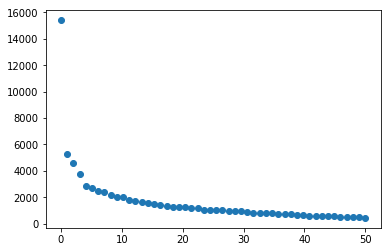

In [23]:
#Plot od singular values distribution for 0
plt.scatter(np.linspace(0,size_of_base,(svds[7][1].shape[0])),svds[0][1])

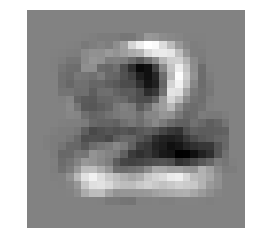

In [24]:
plot_digit(svds[2][0][:,2])

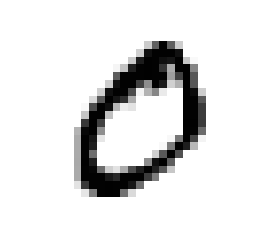

In [25]:
plot_digit(X_train1[0])

In [26]:
#Finding how many singular values represent >97% "energy"
def findEnergy_coeff(s):
    for k in range(len(s)):
        en = sum(s[:k]**2)/sum(s**2)
        if en >= 0.97:
            return k

In [27]:
sigmas = []
for q in range(len(svds)):
    sigmas.append(findEnergy_coeff(svds[q][1]))
sigmas

[28, 20, 32, 30, 32, 33, 29, 27, 32, 27]

In [28]:
#Energy unit test
ener = 0
totE = sum(svds[0][1]**2)
for i in range(0,100):
    ener = ener + svds[0][1][i]**2
    if ener/totE >= 0.97:
        print(i+1)
        break

28


In [29]:
#unit test
sum(svds[0][1][:54]**2)/sum(svds[0][1]**2)

1.0

In [30]:
#left-singular matrices in approximated k-rank
U_ks = []
for i in range(len(svds)):
    temp = svds[i][0][:,:sigmas[i]]
    U_ks.append(temp)

In [31]:
#Calculating distance of new digit to digit-space. Minimal distance = digit
def identifyNewDigit(P):
    dists = []
    for i in range(len(svds)):
        dists.append(np.linalg.norm(np.dot(U_ks[i].dot(U_ks[i].T),P)-P))
    return dists.index(min(dists))

In [32]:
def testRun_onTrainingSet(num):
    counter = 0
    mistakes = []
    answers = []
    for i in range(num):
        n = np.random.randint(len(X_train1))
        P = X_train1[n]
        guess = identifyNewDigit(P)
        ans = y_train1[n]
        answers.append(ans)
        if guess==ans:
            counter += 1
        else:
            mistakes.append(ans)
    return counter/num, mistakes, answers

In [33]:
def testRun_onValidationSet(num):
    counter = 0
    mistakes = []
    answers = []
    for i in range(num):
        n = np.random.randint(len(X_val))
        P = X_val[n]
        guess = identifyNewDigit(P)
        ans = y_val[n]
        answers.append(ans)
        if guess==ans:
            counter += 1
        else:
            mistakes.append(ans)
    return counter/num, mistakes, answers

In [34]:
def testRun_onTestSet(num):
    counter = 0
    mistakes = []
    answers = []
    for i in range(num):
        n = np.random.randint(len(X_test))
        P = X_test[n]
        guess = identifyNewDigit(P)
        ans = y_test[n]
        answers.append(ans)
        if guess==ans:
            counter += 1
        else:
            mistakes.append(ans)
    return counter/num, mistakes, answers

In [35]:
#visual test of algorithm

In [36]:
testDigit = X_train1[np.random.randint(0,48000)]

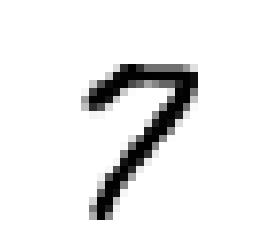

In [37]:
plot_digit(testDigit)

In [38]:
identifyNewDigit(testDigit)

7

In [39]:
#Number of test digits
runSize = 50

In [40]:
#Test run on training set
acc_score, mistakes, answers = testRun_onTrainingSet(runSize)

In [41]:
acc_score

0.96

In [42]:
digits, mistake_freq = np.unique(mistakes, return_counts = True)
ds, dig_freq = np.unique(answers, return_counts = True)

In [43]:
#Number of each digits tested
ds, dig_freq

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 array([ 3,  5,  5,  2, 11,  4,  5,  6,  4,  5], dtype=int64))

In [44]:
#Mistakes by digit
digits, mistake_freq

(array([ 2.,  8.]), array([1, 1], dtype=int64))

In [ ]:
#plot  of mistakes - will fail if there are digits the algorithm guessed all right - fix in future!
#increase runSize variable to ~1000
fig, ax = plt.subplots()
ax.scatter(digits, mistake_freq/dig_freq, marker='x', c='r')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])
ax.set_ylim(bottom=0)
plt.title('Pogrešno klasificirane znamenke na trening setu')
plt.savefig('jupyter_charts/mistakes1.png')

In [45]:
#Test run on validation set
acc_score2, mistakes2, answers2 = testRun_onValidationSet(runSize)

In [46]:
acc_score2

0.88

In [47]:
digits2, mistake_freq2 = np.unique(mistakes2, return_counts = True)
ds2, dig_freq2 = np.unique(answers2, return_counts = True)

In [48]:
#Number of each digits tested
ds2, dig_freq2

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 array([ 5, 12,  2,  4,  4,  3,  3,  6,  3,  8], dtype=int64))

In [49]:
#Mistakes by digit
digits2, mistake_freq2

(array([ 7.,  8.,  9.]), array([2, 1, 3], dtype=int64))

In [ ]:
#plot  of mistakes - will fail if there are digits the algorithm guessed all right - fix in future!
#increase runSize variable to ~1000
fig, ax = plt.subplots()
ax.scatter(digits2, mistake_freq2/dig_freq2, marker='x', c='r')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])
ax.set_ylim(bottom=0)
plt.title('Pogrešno klasificirane znamenke na validacijskom setu')
plt.savefig('jupyter_charts/mistakes2.png')

In [50]:
#Test run on the main test set
acc_score3, mistakes3, answers3 = testRun_onTestSet(runSize)

In [51]:
acc_score3

0.86

In [52]:
digits3, mistake_freq3 = np.unique(mistakes3, return_counts = True)
ds3, dig_freq3 = np.unique(answers3, return_counts = True)

In [53]:
#Number of each digits tested
ds3, dig_freq3

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 array([9, 6, 5, 5, 5, 5, 3, 4, 5, 3], dtype=int64))

In [54]:
#Mistakes by digit
digits3, mistake_freq3

(array([ 0.,  2.,  3.,  5.,  7.,  8.]), array([1, 1, 1, 1, 1, 2], dtype=int64))

In [ ]:
#plot  of mistakes - will fail if there are digits the algorithm guessed all right - fix in future!
#increase runSize variable to ~1000
fig, ax = plt.subplots()
ax.scatter(digits3, mistake_freq3/dig_freq3, marker='x', c='r')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])
ax.set_ylim(bottom=0)
plt.title('Pogrešno klasificirane znamenke na test setu')
plt.savefig('jupyter_charts/mistakes3.png')

In [55]:
print('Veličina setova: ', X_train1.shape[0],',', X_val.shape[0],',', X_test.shape[0])
print('Broj nepoznatih znamenki: ', runSize)
print('Točnosti po setu: ', acc_score*100,'%',',',acc_score2*100,'%',',',acc_score3*100,'%')
print('Prosječna točnost:',((acc_score+acc_score2+acc_score3)/3.0)*100,'%')

Veličina setova:  48000 , 11990 , 10000
Broj nepoznatih znamenki:  50
Točnosti po setu:  96.0 % , 88.0 % , 86.0 %
Prosječna točnost: 89.99999999999999 %


In [ ]:
#plot  of mistakes - will fail if there are digits the algorithm guessed all right - fix in future!
#increase runSize variable to ~1000
fig, ax = plt.subplots()
plt.scatter(digits, mistake_freq/dig_freq, marker='x', c='r')
plt.scatter(digits2, mistake_freq2/dig_freq2, marker='2', c='b')
plt.scatter(digits3, mistake_freq3/dig_freq3, marker='o', c='g')
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9])
plt.title('Pogreške na sva tri seta')
plt.savefig('jupyter_charts/rel_mistakes.png')

Time measurements

In [ ]:
%%timeit -n1 -r1
acc_score, mistakes, answers = testRun_onTrainingSet(1000)

In [ ]:
%%timeit -n1 -r1
acc_score2, mistakes2, answers2 = testRun_onValidationSet(1000)

In [ ]:
%%timeit -n1 -r1
acc_score3, mistakes3, answers3 = testRun_onTestSet(1000)

In [ ]:
%%timeit -n1 -r3
temp2 = []
for b in bases:
    temp.append(np.linalg.svd(b))
svds2 = np.array(temp)